In [6]:
import pandas as pd
import numpy as np
from scipy import stats

import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from mlxtend.plotting import plot_decision_regions
from matplotlib import pyplot as plt
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

# adjust styles
plt.style.use(['seaborn-paper'])

SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [7]:
mu_0 = [-1,-1]
cov_0 = [[0.3, 0], [0, 0.5]]  # diagonal covariance
class_0 = pd.DataFrame(np.random.multivariate_normal(mu_0, cov_0, size=3000))
class_0['y'] = 0
class_0.columns = ['x1', 'x2', 'y']

mu_1 = [1,1]
cov_1 = [[0.3, 0.0], [0.0, 0.5]]
class_1 = pd.DataFrame(np.random.multivariate_normal(mu_1, cov_1, size=3000))
class_1['y'] = 1
class_1.columns = ['x1', 'x2', 'y']

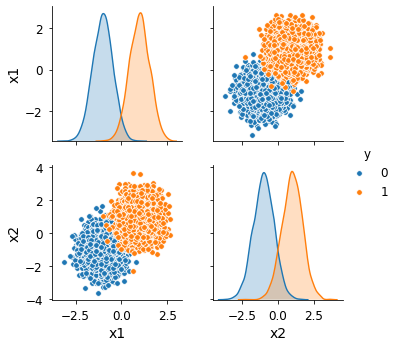

In [8]:
sns.pairplot(pd.concat([class_0, class_1]),kind='scatter', hue='y', x_vars=['x1', 'x2'], y_vars=['x1', 'x2'])

In [9]:
df = pd.concat([class_0, class_1], ignore_index=True)

In [10]:
X_train, X_temp, y_train, y_temp = train_test_split(df[['x1', 'x2']], df['y'], stratify=df['y'], test_size=0.66)

In [11]:
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, stratify=y_temp, test_size=0.5)

In [12]:
df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)
df_val = pd.concat([X_val, y_val], axis=1)

In [13]:
#df_val

**model**

In [14]:
# init model
clf = LogisticRegression(solver='lbfgs')

# train model
clf.fit(X_train, y_train)

# get hard and soft predictions
y_pred = clf.predict(X_val)
y_pred_proba = clf.predict_proba(X_val)[:,0]

# reference df_val
df_ref = df_val.copy()
df_ref['y_pred'] = y_pred
df_ref['y_pred_proba'] = y_pred_proba

# get hard and soft predictions
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:,0]

# reference df_val
df_test = df_test.copy()
df_test['y_pred'] = y_pred
df_test['y_pred_proba'] = y_pred_proba

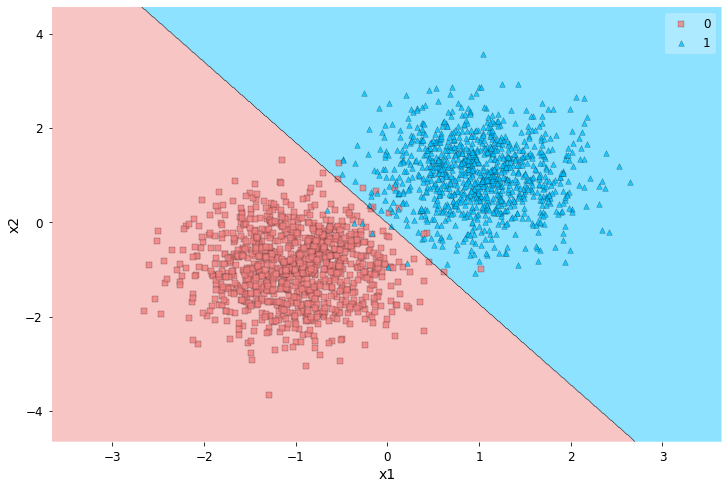

In [15]:
# DECISION BOUNDARY PLOT
fig, ax = plt.subplots(nrows=1, figsize=(12,8))
plot_decision_regions(X=X_val.values, y=y_val.values, clf=clf, ax=ax, colors='lightcoral,deepskyblue', legend=True )
#fig.suptitle("Logistic Regression Decision Boundary")
#fig.suptitle("Logistic Regression Decision Boundary")
ax.set_xlabel('x1')
ax.set_ylabel('x2')
#fig.tight_layout()
#legend = ax.legend(ax.get_legend(),labels=['m', 'f'])
#legend.set
fig.savefig('Decision_Boundary.pdf', bbox_inches='tight')

In [16]:
print(classification_report(df_ref['y'], df_ref['y_pred']))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       990
           1       0.99      0.99      0.99       990

    accuracy                           0.99      1980
   macro avg       0.99      0.99      0.99      1980
weighted avg       0.99      0.99      0.99      1980



$p(\vec{x})$

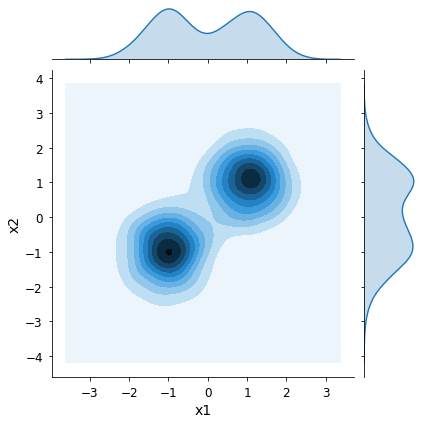

In [17]:
g = sns.jointplot(data=df_test, x='x1', y='x2', kind='kde')
#g.set_axis_labels('x1', 'height in cm', fontsize=16)
g.savefig('joint_px.pdf', bbox_inches='tight')

$P(y_{pred})$

In [18]:
counts_full = df_test['y_pred'].value_counts(normalize=True)

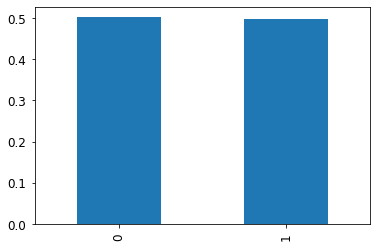

In [19]:
counts_full.plot(kind='bar')

$p(y_{pred\_proba})$

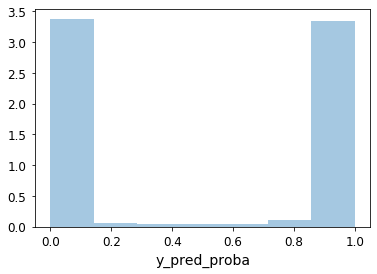

In [20]:
sns.distplot(df_test['y_pred_proba'], kde=False, norm_hist=True)

### sudden shifts

$\mu_0$

In [21]:
mu_0 = [-0.3,-0.3]
cov_0 = [[0.2, 0], [0, 0.5]]  # diagonal covariance
class_0 = pd.DataFrame(np.random.multivariate_normal(mu_0, cov_0, size=1000))
class_0['y'] = 0
class_0.columns = ['x1', 'x2', 'y']

mu_1 = [1,1]
cov_1 = [[0.2, 0.0], [0.0, 0.5]]
class_1 = pd.DataFrame(np.random.multivariate_normal(mu_1, cov_1, size=1000))
class_1['y'] = 1
class_1.columns = ['x1', 'x2', 'y']

df_shift_1 = pd.concat([class_0, class_1], ignore_index=True)

In [22]:
def generate_plots(df_ref, df_shift, clf_old, clf_new):
    df_shift['y_pred'] = clf.predict(df_shift[['x1', 'x2']])
    df_shift['y_pred_proba'] = clf.predict_proba(df_shift[['x1', 'x2']])[:,0]
    
    fig1 = sns.pairplot(df_shift_1, kind='scatter', hue='y', x_vars=['x1', 'x2'],
                        y_vars=['x1', 'x2'])
    
    plt.close()
    fig2 = sns.jointplot(data=df_shift, x='x1', y='x2', kind='kde')
    
    fig3 = sns.distplot(df_shift['y_pred_proba'], kde=False, norm_hist=True)
    plt.close()
    
    counts_full = df_shift['y_pred'].value_counts(normalize=True)
    
    fig4 = counts_full.plot(kind='bar')
    plt.close()
    
    # DECISION BOUNDARY PLOT
    
    clf_new = LogisticRegression()
    clf_new.fit(df_shift[['x1', 'x2']], df_shift['y'])
    
    fig5, ax = plt.subplots(nrows=1, figsize=(12,8))
    plot_decision_regions(X=df_shift[['x1', 'x2']].values, y=df_shift['y'].values, clf=clf_old, ax=ax, colors='lightcoral,deepskyblue', legend=True, contourf_kwargs={'linestyles':['dotted', 'dotted']} )
    handles, labels = ax.get_legend_handles_labels()
    #ax.legend(handles, 
    #          ['', 'm'], 
    #           framealpha=0.3, scatterpoints=1)
    #norml = colors.BoundaryNorm(lev, 256)
    plot_decision_regions(X=df_shift[['x1', 'x2']].values, y=df_shift['y'].values, clf=clf_new, ax=ax, colors='lightcoral,deepskyblue', legend=False, contourf_kwargs={'alpha':0.0, 'norm':'default'})
    #fig.suptitle("Logistic Regression Decision Boundary")
    #fig.suptitle("Logistic Regression Decision Boundary")
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    #fig.tight_layout()
    #legend = ax.legend(ax.get_legend(),labels=['m', 'f'])
    #legend.set
    fig.savefig('Decision_Boundary_prime.pdf', bbox_inches='tight')
    ax.lines
    plt.close()
    
    f1 = f1_score(df_shift['y'], df_shift['y_pred'])
    
    return df_shift, [fig1, fig2, fig3, fig4, fig5], f1

In [23]:
res = generate_plots(df_ref, df_shift_1, clf, clf_shift_1)

NameError: name 'clf_shift_1' is not defined

In [ ]:
res[0].describe()

In [ ]:
sns.pairplot(df_shift_1, kind='scatter', hue='y', x_vars=['x1', 'x2'], y_vars=['x1', 'x2'])

In [ ]:
g = sns.jointplot(data=df_shift_1, x='x1', y='x2', kind='kde')
#g.set_axis_labels('x1', 'height in cm', fontsize=16)
g.savefig('joint_px.pdf', bbox_inches='tight')

In [ ]:
clf_shift_1 = LogisticRegression()
clf_shift_1.fit(df_shift_1[['x1', 'x2']], df_shift_1['y'])

In [ ]:
clf_shift_1.fit(df_shift_1[['x1', 'x2']], df_shift_1['y'])

In [ ]:
# DECISION BOUNDARY PLOT
fig, ax = plt.subplots(nrows=1, figsize=(12,8))
plot_decision_regions(X=df_shift_1[['x1', 'x2']].values, y=df_shift_1['y'].values, clf=clf, ax=ax, colors='lightcoral,deepskyblue', legend=True, contourf_kwargs={'linestyles':['dotted', 'dotted']} )
handles, labels = ax.get_legend_handles_labels()
#ax.legend(handles, 
#          ['', 'm'], 
#           framealpha=0.3, scatterpoints=1)
#norml = colors.BoundaryNorm(lev, 256)
plot_decision_regions(X=df_shift_1[['x1', 'x2']].values, y=df_shift_1['y'].values, clf=clf_shift_1, ax=ax, colors='lightcoral,deepskyblue', legend=False, contourf_kwargs={'alpha':0.0, 'norm':'default'})
#fig.suptitle("Logistic Regression Decision Boundary")
#fig.suptitle("Logistic Regression Decision Boundary")
ax.set_xlabel('x1')
ax.set_ylabel('x2')
#fig.tight_layout()
#legend = ax.legend(ax.get_legend(),labels=['m', 'f'])
#legend.set
fig.savefig('Decision_Boundary_prime.pdf', bbox_inches='tight')
ax.lines

In [ ]:
df_shift_1['y_pred'] = clf.predict(df_shift_1[['x1', 'x2']])
df_shift_1['y_pred_proba'] = clf.predict_proba(df_shift_1[['x1', 'x2']])[:,0]

In [ ]:
print(classification_report(df_shift_1['y'], df_shift_1['y_pred']))

In [24]:
df_shift_1.describe()

,x1,x2,y
count,2000.000000,2000.000000,2000.000000
mean,0.351114,0.380384,0.500000
std,0.783048,0.941378,0.500125
min,-1.518003,-2.505297,0.000000
25%,-0.286093,-0.340187,0.000000
50%,0.350717,0.398026,0.500000
75%,0.982872,1.081597,1.000000
max,2.581628,3.296247,1.000000


In [25]:
df_ref.describe()

,x1,x2,y,y_pred,y_pred_proba
count,1980.000000,1980.000000,1980.000000,1980.000000,1.980000e+03
mean,-0.012493,0.028896,0.500000,0.503030,4.984321e-01
std,1.141177,1.231950,0.500126,0.500117,4.865107e-01
min,-2.660220,-3.655537,0.000000,0.000000,2.803123e-08
25%,-1.005969,-0.966798,0.000000,0.000000,5.167596e-04
50%,-0.016523,0.038830,0.500000,1.000000,3.801855e-01
75%,0.983250,1.020251,1.000000,1.000000,9.993895e-01
max,2.644280,3.573654,1.000000,1.000000,1.000000e+00


# $\sigma' $ > $\sigma$ 

In [26]:
mu_0 = [-1,-1]
cov_0 = [[0.7, 0], [0, 0.7]]  # diagonal covariance
class_0 = pd.DataFrame(np.random.multivariate_normal(mu_0, cov_0, size=1000))
class_0['y'] = 0
class_0.columns = ['x1', 'x2', 'y']

mu_1 = [1,1]
cov_1 = [[0.3, 0.0], [0.0, 0.5]]
class_1 = pd.DataFrame(np.random.multivariate_normal(mu_1, cov_1, size=1000))
class_1['y'] = 1
class_1.columns = ['x1', 'x2', 'y']

df_shift_2 = pd.concat([class_0, class_1], ignore_index=True)

In [27]:
res = generate_plots(df_ref, df_shift_2, clf, None)

/home/jodahr/anaconda3/envs/ml-default/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


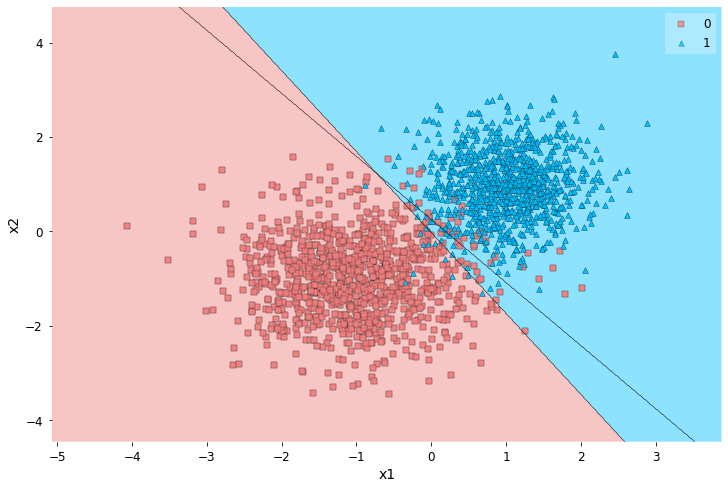

In [28]:
res[1][-1]

In [29]:
def ks_ref(series_ref, sample, win_size, combine=True):
    if combine:
        sample = pd.concat([series_ref, sample], ignore_index=True)
    res = sample.rolling(win_size).apply(lambda x: stats.ks_2samp(series_ref, x)[1])
    return res

In [31]:
res_10 = ks_ref(df_ref['y_pred_proba'], res[0]['y_pred_proba'], win_size=10)

/home/jodahr/anaconda3/envs/ml-default/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  after removing the cwd from sys.path.


In [32]:
res_10.describe()

count    3971.000000
mean        0.246014
std         0.310303
min         0.000002
25%         0.004590
50%         0.025219
75%         0.486725
max         0.999329
Name: y_pred_proba, dtype: float64

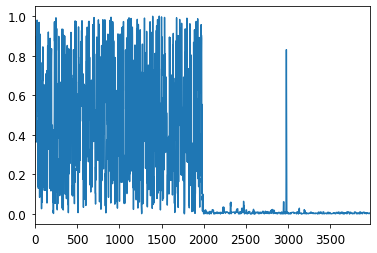

In [33]:
res_10.plot()

In [34]:
res_100 = ks_ref(df_ref['y_pred_proba'], res[0]['y_pred_proba'], win_size=100)

/home/jodahr/anaconda3/envs/ml-default/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  after removing the cwd from sys.path.


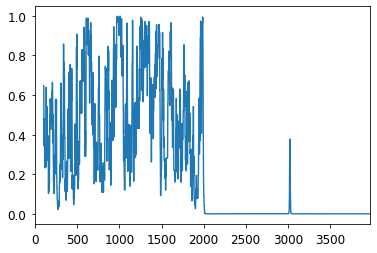

In [35]:
res_100.plot()

/home/jodahr/anaconda3/envs/ml-default/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  after removing the cwd from sys.path.


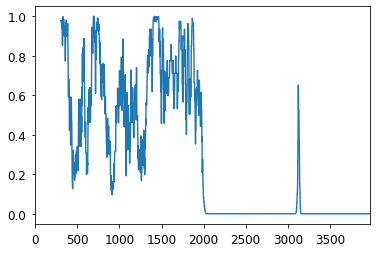

In [36]:
res_300 = ks_ref(df_ref['y_pred_proba'], res[0]['y_pred_proba'], win_size=300)
res_300.plot()

In [ ]:
def how_early(ref, shift):
    # p(height)
    ks_stats = []
    samples = []
    for element in shift:
        samples.append(element)
        k, p = stats.ks_2samp(ref, samples)
        ks_stats.append(p)
    
    # comparison of model predictions
    fig, ax = plt.subplots(nrows=1)
    pd.Series(ks_stats).head(100).plot(ax=ax, linestyle='None', marker='o', label='p value')
    ax.axhline(0.05, c='r', label='5% cl')
    ax.legend()
    return fig, ks_stats

In [ ]:
fig, res = how_early(df_ref['y_pred_proba'], df_shift_1['y_pred_proba'])

In [ ]:
res_series = pd.Series(res)

In [ ]:
res_series[res_series < 0.05]

In [ ]:
fig, res = how_early(df_ref['y_pred_proba'], df_ref['y_pred_proba'])

In [ ]:
pd.Series(res).plot()

In [ ]:
res_series